In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("StudyHoursWithFeatures.csv")

In [3]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [4]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


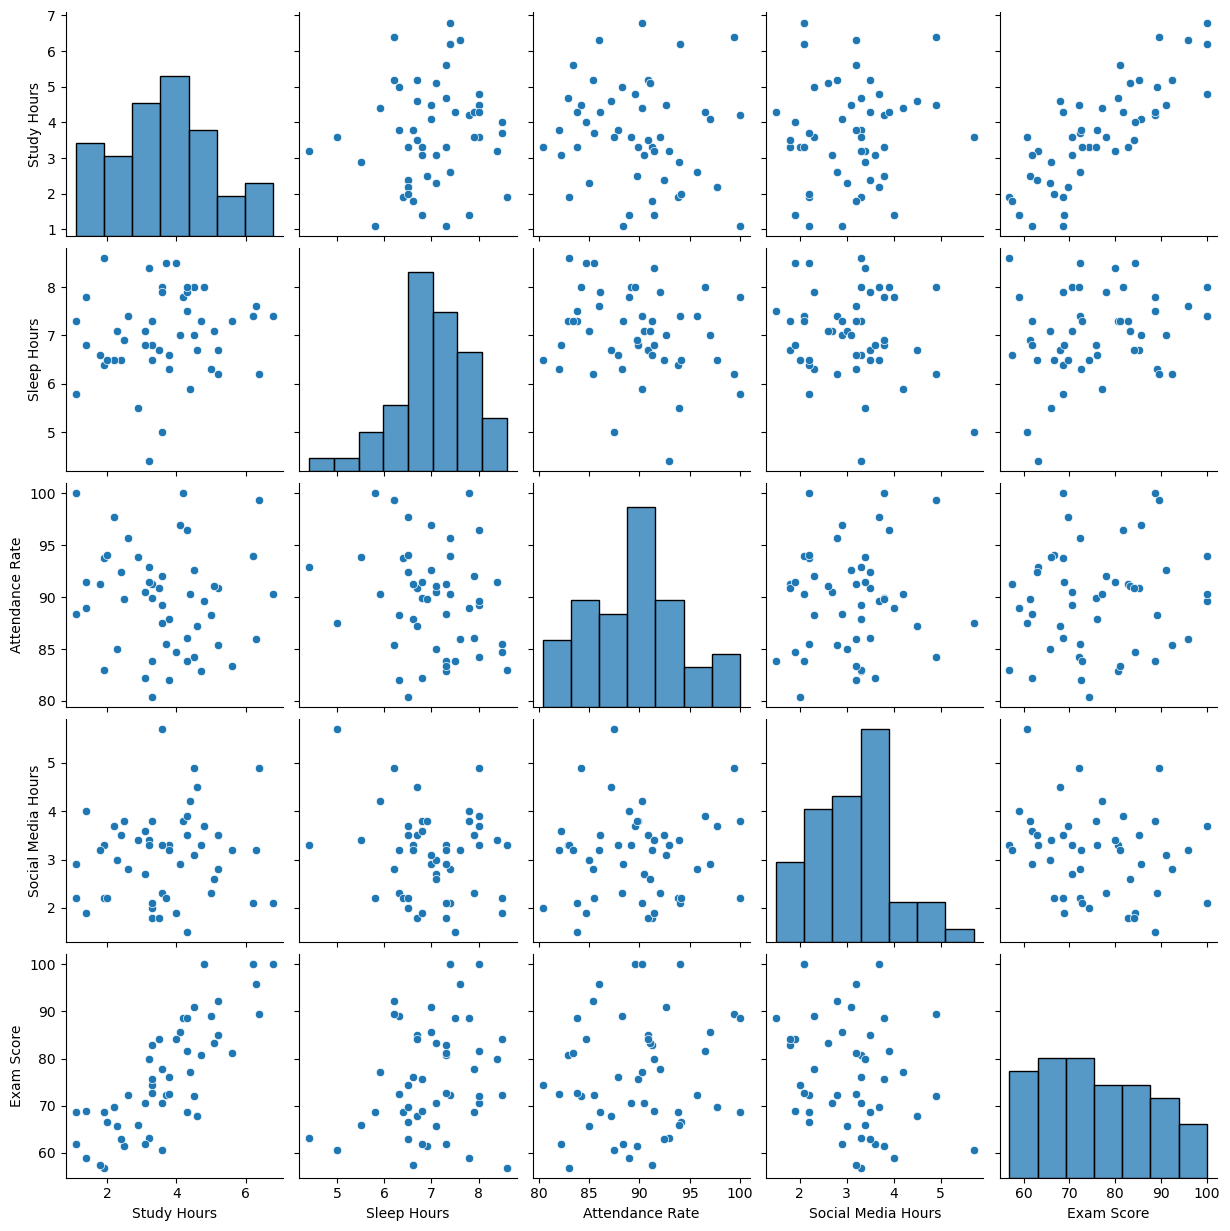

In [7]:
sns.pairplot(data=df)

<Axes: xlabel='Study Hours', ylabel='Exam Score'>

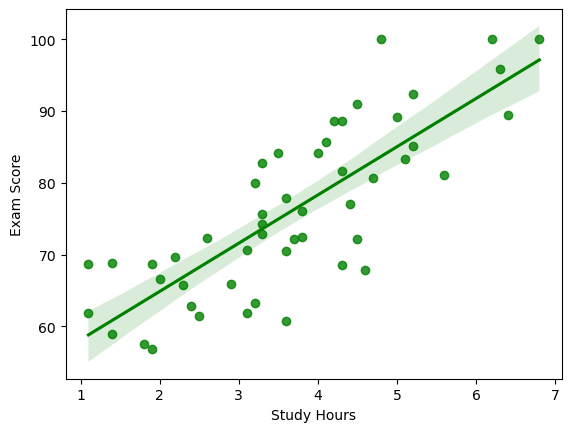

In [12]:
sns.regplot(x=df["Study Hours"], y=df["Exam Score"], color="g")

In [13]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [14]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [28]:
X_train

array([[ 7.64922342e-01,  1.07637448e+00,  2.70413080e-03,
         6.75932027e-01],
       [-1.60676425e+00, -3.94765312e-01,  3.42883785e-01,
         1.46070057e-01],
       [ 1.39737210e+00,  3.40804586e-01, -1.23795108e+00,
         1.46070057e-01],
       [-1.92298913e+00, -1.84602484e-01,  3.82904921e-01,
        -1.23157107e+00],
       [ 2.11528804e-01,  2.55603439e-02,  1.48348616e+00,
        -1.71847126e-01],
       [ 2.90585024e-01,  8.66211656e-01,  2.08380319e+00,
         7.81904421e-01],
       [-2.56398550e-02, -7.10009554e-01, -1.51809903e+00,
         1.46070057e-01],
       [ 9.23034781e-01, -7.10009554e-01, -2.57433252e-01,
        -8.07681490e-01],
       [-4.20920953e-01,  3.40804586e-01, -1.15790881e+00,
        -1.01962628e+00],
       [-2.56398550e-02, -3.94765312e-01, -3.37475524e-01,
         2.52042451e-01],
       [ 3.69641243e-01,  5.50967414e-01, -1.15790881e+00,
        -1.65546064e+00],
       [-9.74314491e-01,  4.45886000e-01,  1.22334877e+00,
      

In [29]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [30]:
regression.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred= regression.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mse:", mse)
print("Mae:", mae)
print("r2:", r2)
#adjusted R-squared
print(1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Mse: 14.600589378986257
Mae: 3.277026485962786
r2: 0.915670734577271
0.8735061018659065


In [38]:
residuals=y_test - y_pred

In [41]:
print(regression.intercept_)
print(regression.coef_)

77.41081081081082
[ 9.28014703  1.78967062  3.24340001 -4.08127695]


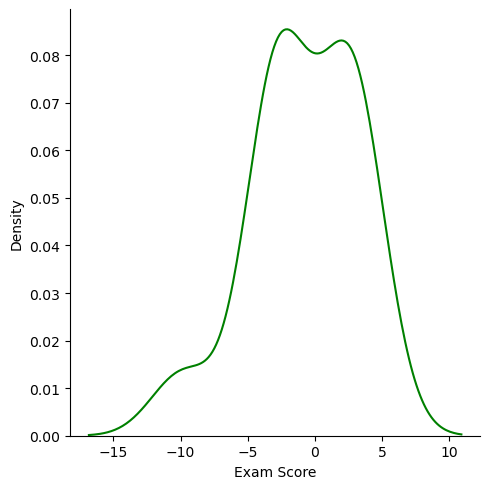

In [40]:
sns.displot(residuals,kind="kde", color="g")